In [ ]:
import pandas as pd

### Train Data

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.sort_values(by=['Survived'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
521,522,0,3,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C


In [ ]:
data = df.copy()

data['Pclass'] = data.Pclass.astype('category')
data['pclass'] = data.Pclass.cat.codes
data['ชั้นที่นั่ง'] = data.Pclass.cat.codes

data['Sex'] = data.Sex.astype('category')
data['sex'] = data.Sex.cat.codes
data['เพศ'] = data.Sex.cat.codes

data['พี่น้อง'] = data.SibSp
data['ลูก'] = data.Parch

data['Survived'] = data.Survived.astype('category')

In [ ]:
data.columns
data.sort_values(by='Survived')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass,ชั้นที่นั่ง,sex,เพศ,พี่น้อง,ลูก
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2,1,1,1,0
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S,2,2,1,1,0,0
521,522,0,3,"Vovk, Mr. Janko",male,22.0,0,0,349252,7.8958,NaN,S,2,2,1,1,0,0
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C,2,2,1,1,0,0
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,NaN,S,1,1,0,0,1,0
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C,0,0,0,0,1,0
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S,2,2,0,0,0,0
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,0,0,0,0,0,0


In [ ]:
columns = ['เพศ', 'ชั้นที่นั่ง', 'พี่น้อง',"ลูก"]
X = data[ columns ].values
y = data.Survived.cat.codes

In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Length: 891, dtype: int8

### DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "entropy")
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

ผลลัพธ์ของ Tree

Don't forget to `pip install graphviz`

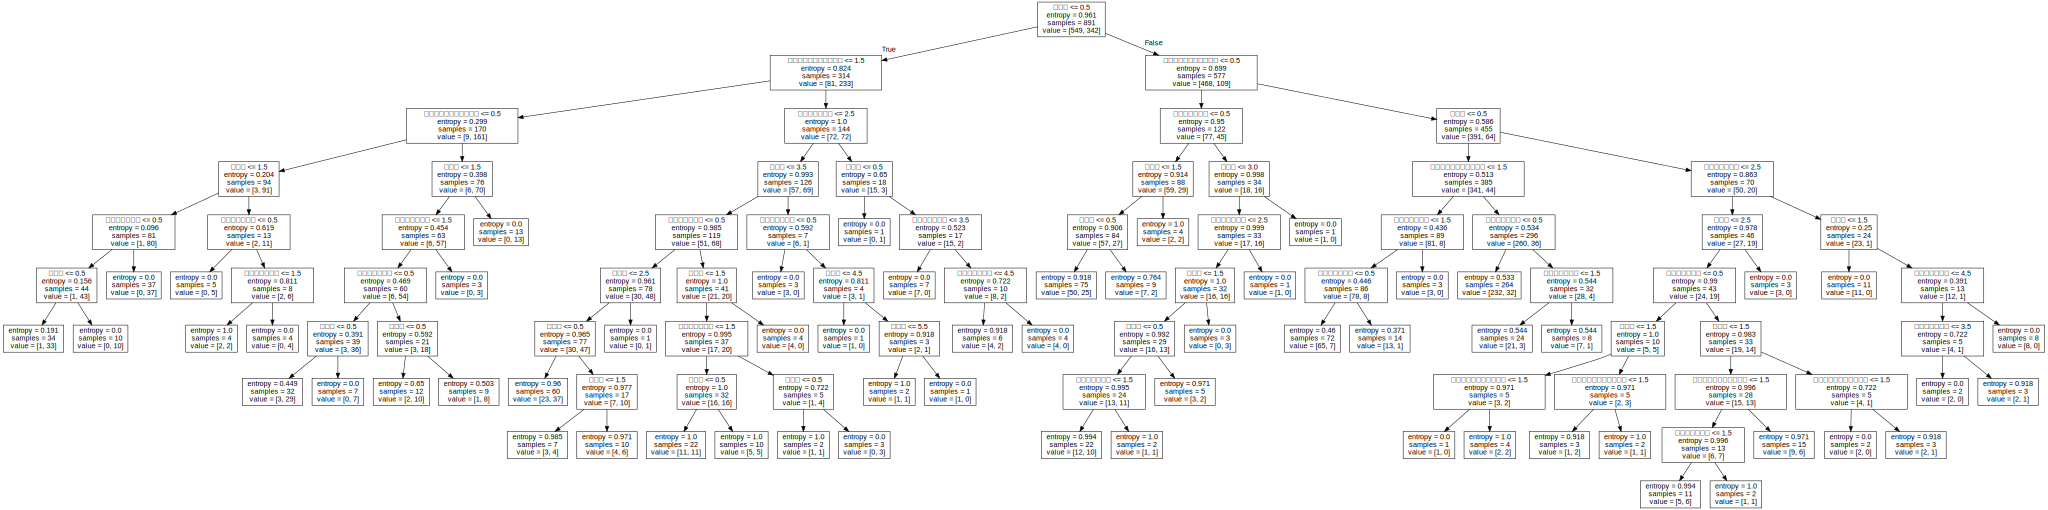

In [ ]:
import graphviz 
import sklearn
dot_data = sklearn.tree.export_graphviz(tree, out_file=None, feature_names=columns)
graphviz.Source(dot_data)

1) if เพศ <= 0.5 and ชั้นที่นั่ง <= 1.5 and ชั้นที่นั่ง > 0.5 and ลูก >= 1.5 then Survived = "รอด"

2) if เพศ > 0.5 and ชั้นที่นั่ง <= 0.5 and พี่น้อง > 0.5 ant ลูก > 3.0 then Survived = "ไม่รอด"

In [ ]:
def code(column, text):
    return [ i for i in range(len(column.cat.categories)) if column.cat.categories[i] == text ][0]

def dx(x):
    return [ code(data.Sex, x[0]),x[1],x[2],x[3] ]


def Survived(x):
    d = dx(x)
    print(d)
    p = tree.predict([ d ])
    print(data.Survived.cat.categories[p[0]])

In [ ]:
Survived([ 'male',3,0,2 ])

[1, 3, 0, 2]
0


In [ ]:
Survived([ 'female',1,2,1 ])

[0, 1, 2, 1]
1


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split( X, y, test_size = 0.3, random_state=0)
tree = DecisionTreeClassifier(criterion = "entropy")
tree = tree.fit(Xtrain, ytrain)
ypred = tree.predict(Xtest)

วิเคราะห์ความถูกต้อง

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(ypred, ytest))


0.7835820895522388


แสดงผลลัพธ์ด้วย confusion matrix

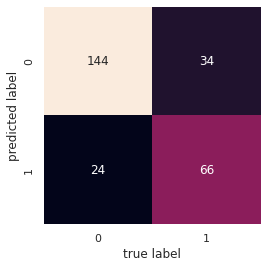

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Test Data

In [ ]:
df = pd.read_csv("/content/test.csv")
df.head()

,PassengerId,Survived,PassengerId.1,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,0,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.sort_values(by=['Survived'])

,PassengerId,Survived,PassengerId.1,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
256,1148,0,1148,3,"Mahon, Mr. John",male,NaN,0,0,AQ/4 3130,7.7500,NaN,Q
255,1147,0,1147,3,"MacKay, Mr. George William",male,NaN,0,0,C.A. 42795,7.5500,NaN,S
254,1146,0,1146,3,"Wenzel, Mr. Linhart",male,32.5,0,0,345775,9.5000,NaN,S
253,1145,0,1145,3,"Salander, Mr. Karl Johan",male,24.0,0,0,7266,9.3250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,964,1,964,3,"Nieminen, Miss. Manta Josefina",female,29.0,0,0,3101297,7.9250,NaN,S
205,1097,1,1097,1,"Omont, Mr. Alfred Fernand",male,NaN,0,0,F.C. 12998,25.7417,NaN,C
70,962,1,962,3,"Mulvihill, Miss. Bertha E",female,24.0,0,0,382653,7.7500,NaN,Q
77,969,1,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S


In [ ]:
data = df.copy()

data['Pclass'] = data.Pclass.astype('category')
data['pclass'] = data.Pclass.cat.codes
data['ชั้นที่นั่ง'] = data.Pclass.cat.codes

data['Sex'] = data.Sex.astype('category')
data['sex'] = data.Sex.cat.codes
data['เพศ'] = data.Sex.cat.codes

data['พี่น้อง'] = data.SibSp

data['Survived'] = data.Survived.astype('category')

In [ ]:
data.columns
data.sort_values(by='Survived')

,PassengerId,Survived,PassengerId.1,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass,ชั้นที่นั่ง,sex,เพศ,พี่น้อง
0,892,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2,2,1,1,0
256,1148,0,1148,3,"Mahon, Mr. John",male,NaN,0,0,AQ/4 3130,7.7500,NaN,Q,2,2,1,1,0
255,1147,0,1147,3,"MacKay, Mr. George William",male,NaN,0,0,C.A. 42795,7.5500,NaN,S,2,2,1,1,0
254,1146,0,1146,3,"Wenzel, Mr. Linhart",male,32.5,0,0,345775,9.5000,NaN,S,2,2,1,1,0
253,1145,0,1145,3,"Salander, Mr. Karl Johan",male,24.0,0,0,7266,9.3250,NaN,S,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,964,1,964,3,"Nieminen, Miss. Manta Josefina",female,29.0,0,0,3101297,7.9250,NaN,S,2,2,0,0,0
205,1097,1,1097,1,"Omont, Mr. Alfred Fernand",male,NaN,0,0,F.C. 12998,25.7417,NaN,C,0,0,1,1,0
70,962,1,962,3,"Mulvihill, Miss. Bertha E",female,24.0,0,0,382653,7.7500,NaN,Q,2,2,0,0,0
77,969,1,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S,0,0,0,0,2


In [ ]:
columns = ['เพศ', 'ชั้นที่นั่ง', 'พี่น้อง']
X = data[ columns ].values
y = data.Survived.cat.codes

In [ ]:
y

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int8

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "entropy")
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

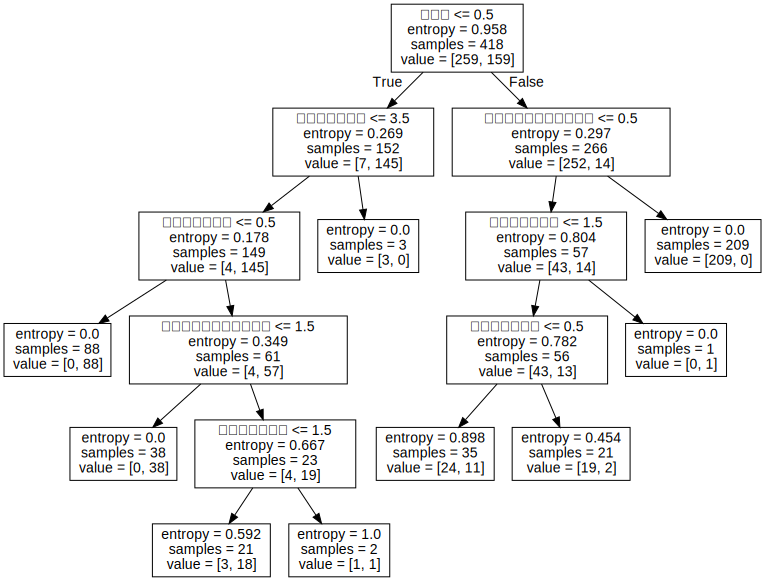

In [ ]:
dot_data = sklearn.tree.export_graphviz(tree, out_file=None, feature_names=columns)
graphviz.Source(dot_data)

### 9 Rules
1) if เพศ <= 0.5 and พี่น้อง > 3.5 then Survived = "ไม่รอด"

2) if เพศ > 0.5 and ชั้นที่นั่ง <= 0.5 and พี่น้อง > 1.5 then Survived = "รอด"

In [ ]:
def code(column, text):
    return [ i for i in range(len(column.cat.categories)) if column.cat.categories[i] == text ][0]

def dx(x):
    return [ code(data.Sex, x[0]),x[1],x[2] ]


def Survived(x):
    d = dx(x)
    print(d)
    p = tree.predict([ d ])
    print(data.Survived.cat.categories[p[0]])

In [ ]:
Survived([ 'male',3,2 ])

[1, 3, 2]
0


In [ ]:
Survived([ 'female',2,0 ])

[0, 2, 0]
1


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split( X, y, test_size = 0.3, random_state=0)
tree = DecisionTreeClassifier(criterion = "entropy")
tree = tree.fit(Xtrain, ytrain)
ypred = tree.predict(Xtest)

In [ ]:
print(metrics.accuracy_score(ypred, ytest))

0.9444444444444444


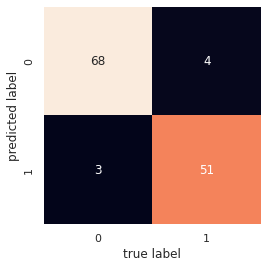

In [ ]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');